### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7


### Дисциплина: Интеллектуальный анализ данных

## Москва 2022

### Вариант № 28

# 1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [1]:
import numpy as np
import pandas as pd
import warnings
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

warnings.filterwarnings("ignore")

In [2]:
massiv = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/hepatitis/hepatitis.data", delimiter=",", header=None)
massiv.columns=[i for i in range (1,massiv.shape[1]+1)]
massiv.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,2,30,2,1,2,2,2,2,1,2,2,2,2,2,1.00,85,18,4.0,?,1
1,2,50,1,1,2,1,2,2,1,2,2,2,2,2,0.90,135,42,3.5,?,1
2,2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.70,96,32,4.0,?,1
3,2,31,1,?,1,2,2,2,2,2,2,2,2,2,0.70,46,52,4.0,80,1
4,2,34,1,2,2,2,2,2,2,2,2,2,2,2,1.00,?,200,4.0,?,1


# 2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки. 


In [3]:
massiv = massiv.replace('?', np.NaN)

In [4]:
massiv[20].isna().sum(),massiv[18].isna().sum()

(0, 16)

In [5]:
massiv=massiv.drop(massiv[massiv[18].isna()==True].index,axis=0)

In [6]:
massiv.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   1       139 non-null    int64 
 1   2       139 non-null    int64 
 2   3       139 non-null    int64 
 3   4       138 non-null    object
 4   5       139 non-null    int64 
 5   6       139 non-null    object
 6   7       139 non-null    object
 7   8       139 non-null    object
 8   9       132 non-null    object
 9   10      131 non-null    object
 10  11      135 non-null    object
 11  12      135 non-null    object
 12  13      135 non-null    object
 13  14      135 non-null    object
 14  15      139 non-null    object
 15  16      120 non-null    object
 16  17      139 non-null    object
 17  18      139 non-null    object
 18  19      87 non-null     object
 19  20      139 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 22.8+ KB


In [7]:
massiv=massiv.astype(float)

# 3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных. 

In [8]:
massiv.isna().sum().sum()

103

In [9]:
for i in massiv.columns:
    massiv[i]=massiv[i].fillna(massiv.groupby([20])[i].transform("median"))

In [10]:
massiv.isna().sum().sum()

0

# 4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений. 

In [11]:
y=massiv[20]
scaler = MinMaxScaler(feature_range=(0,1)).fit(massiv)
X = pd.DataFrame(scaler.transform(massiv)).astype(float)
X.columns=[i for i in range (1,X.shape[1]+1)]
y1=X[18]
X=X.drop([20,18],axis=1)
model = LinearRegression()
rfe = RFE(model)
fit = rfe.fit(X, y);
fit.ranking_

array([ 4,  1,  1,  1,  1,  3,  5,  9,  6,  2,  7,  1,  1,  1, 10,  1,  8,
        1])

In [12]:
len(X[2].unique()),len(X[16].unique()),len(X[12].unique())

(47, 80, 2)

In [13]:
len(X[17].unique()),len(X[16].unique()),len(X[2].unique())

(78, 80, 47)

In [14]:
X=pd.concat([X[[2,16,17]],y1],axis=1).astype(float)
X.columns=[i for i in range (1,X.shape[1]+1)]

# 5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [15]:
axlabels=['Hepatitis Data Set ','AGE',' ALK PHOSPHATE','SGOT ','ALBUMIN']

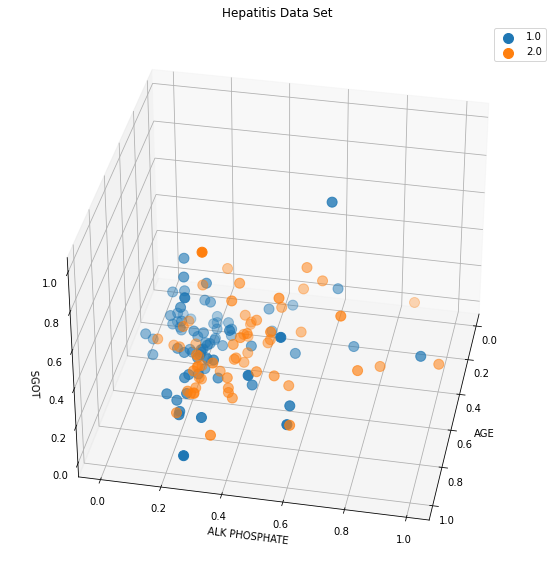

In [36]:
fig = plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
for i in (y.unique()):
    row_ix = np.where(y== i)
    a=X[[1,2,3]].values[row_ix, 0]
    b=X[[1,2,3]].values[row_ix, 1]
    c=X[[1,2,3]].values[row_ix, 2]
    ax.scatter(a, b, c,s=100,label=i )
plt.title(axlabels[0])
plt.xlabel(axlabels[1])
plt.ylabel(axlabels[2])
ax.set_zlabel(axlabels[3])
plt.legend()
ax.view_init(azim=11, elev=35);

# 6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [17]:

X_train1, X_test1, y_train1, y_test1 = train_test_split(X[1].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)
model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': np.arange(2, 6,1)}
grid_search1_1 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search1_1.fit(X_train1, y_train1)


model = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'ridge__alpha': np.arange(0.1, 1.01,0.1)}
grid_search1_2 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search1_2.fit(X_train1, y_train1)


from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 6,1)}
grid_search1_3 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search1_3.fit(X_train1, y_train1)


grid_search1_1.best_params_,grid_search1_2.best_params_,grid_search1_3.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'polynomialfeatures__degree': 2}, {'ridge__alpha': 0.1}, {'n_neighbors': 2})

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X[2].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)

model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': np.arange(2, 6,1)}
grid_search2_1 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search2_1.fit(X_train2, y_train2)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

model = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'ridge__alpha': np.arange(0.1, 1.01,0.1)}
grid_search2_2 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search2_2.fit(X_train2, y_train2)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 6,1)}
grid_search2_3 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search2_3.fit(X_train2, y_train2)


grid_search2_1.best_params_,grid_search2_2.best_params_,grid_search2_3.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'polynomialfeatures__degree': 5}, {'ridge__alpha': 0.1}, {'n_neighbors': 5})

In [19]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X[3].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)

model = make_pipeline(PolynomialFeatures(), LinearRegression())
param_grid = {'polynomialfeatures__degree': np.arange(2, 6,1)}
grid_search3_1 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search3_1.fit(X_train3, y_train3)

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
model = make_pipeline(PolynomialFeatures(), Ridge())
param_grid = {'ridge__alpha': np.arange(0.1, 1.01,0.1)}
grid_search3_2 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search3_2.fit(X_train3, y_train3)

from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor()
param_grid = {'n_neighbors': np.arange(1, 6,1)}
grid_search3_3 = GridSearchCV(model, param_grid, n_jobs=-1, verbose=1)
grid_search3_3.fit(X_train3, y_train3)

grid_search3_1.best_params_,grid_search3_2.best_params_,grid_search3_3.best_params_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits


({'polynomialfeatures__degree': 2}, {'ridge__alpha': 0.4}, {'n_neighbors': 5})

# 7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [20]:
from sklearn.metrics import mean_squared_log_error
scorer=mean_squared_log_error

In [21]:
labels=['LinearRegression', 'Ridge', 'KNeighborsRegressor']

In [22]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search1_2.best_estimator_.predict(X_test1), y_test1),scorer(grid_search1_3.best_estimator_.predict(X_test1), y_test1)

(0.009648212790378256, 0.009473676543824408, 0.019644269894227726)

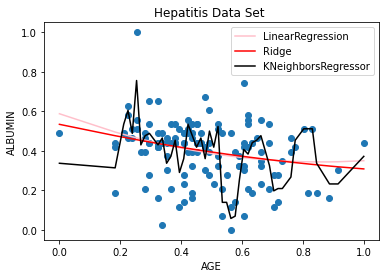

In [23]:
plt.scatter(X[1], X[4])
plt.plot(np.sort(X[1]), grid_search1_1.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='pink',label=labels[0])
plt.plot(np.sort(X[1]), grid_search1_2.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='red',label=labels[1])
plt.plot(np.sort(X[1]), grid_search1_3.best_estimator_.predict(X[1].values.reshape(-1,1))[np.argsort(X[1])], color='black',label=labels[2])
plt.title(axlabels[0])
plt.xlabel(axlabels[1])
plt.ylabel(axlabels[4])
plt.legend()
plt.show()

In [24]:
scorer(grid_search2_1.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_3.best_estimator_.predict(X_test2), y_test2)

(0.00873337567097419, 0.007810002481341467, 0.010288338191573251)

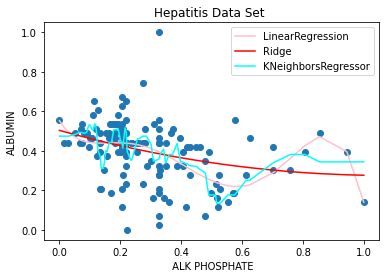

In [25]:
plt.scatter(X[2], X[4])
plt.plot(np.sort(X[2]), grid_search2_1.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='pink',label=labels[0])
plt.plot(np.sort(X[2]), grid_search2_2.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='red',label=labels[1])
plt.plot(np.sort(X[2]), grid_search2_3.best_estimator_.predict(X[2].values.reshape(-1,1))[np.argsort(X[2])], color='cyan',label=labels[2])
plt.title(axlabels[0])
plt.xlabel(axlabels[2])
plt.ylabel(axlabels[4])
plt.legend()
plt.show()

In [26]:
scorer(grid_search3_1.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_2.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(0.010025539141027584, 0.010011435207888298, 0.014812163880256489)

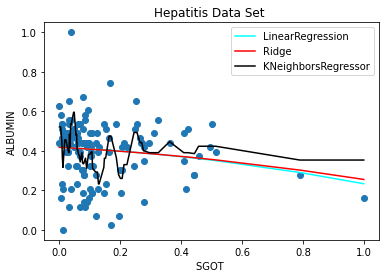

In [35]:
plt.scatter(X[3], X[4])
plt.plot(np.sort(X[3]), grid_search3_1.best_estimator_.predict(X[3].values.reshape(-1,1))[np.argsort(X[3])], color='cyan',label=labels[0])
plt.plot(np.sort(X[3]), grid_search3_2.best_estimator_.predict(X[3].values.reshape(-1,1))[np.argsort(X[3])], color='red',label=labels[1])
plt.plot(np.sort(X[3]), grid_search3_3.best_estimator_.predict(X[3].values.reshape(-1,1))[np.argsort(X[3])], color='black',label=labels[2])
plt.title(axlabels[0])
plt.xlabel(axlabels[3])
plt.ylabel(axlabels[4])
plt.legend()
plt.show()

# 8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

In [28]:
scorer(grid_search1_1.best_estimator_.predict(X_test1), y_test1),scorer(grid_search1_2.best_estimator_.predict(X_test1), y_test1),scorer(grid_search1_3.best_estimator_.predict(X_test1), y_test1),scorer(grid_search2_1.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_2.best_estimator_.predict(X_test2), y_test2),scorer(grid_search2_3.best_estimator_.predict(X_test2), y_test2),scorer(grid_search3_1.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_2.best_estimator_.predict(X_test3), y_test3),scorer(grid_search3_3.best_estimator_.predict(X_test3), y_test3)

(0.009648212790378256,
 0.009473676543824408,
 0.019644269894227726,
 0.00873337567097419,
 0.007810002481341467,
 0.010288338191573251,
 0.010025539141027584,
 0.010011435207888298,
 0.014812163880256489)

In [32]:
print ('Лучший Ridge', grid_search2_2.best_params_, ' для 2 признака')

Лучший Ridge {'ridge__alpha': 0.1}  для 2 признака


In [33]:
from sklearn.metrics import median_absolute_error
scorer=median_absolute_error

ValueError: 'pink' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

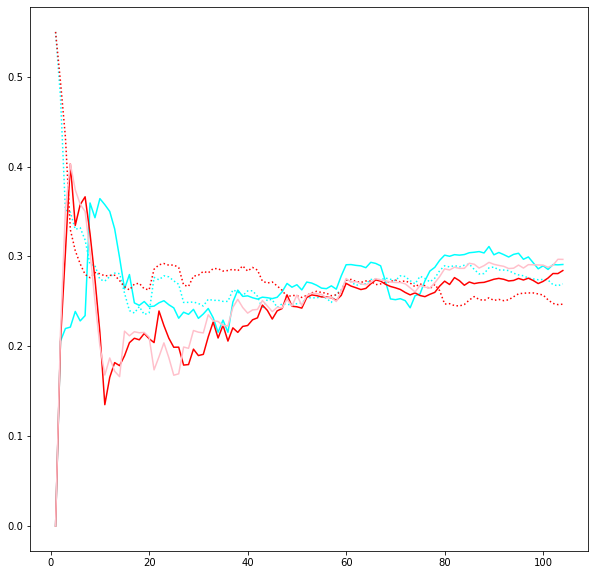

In [34]:
def plot_learning_curve(algo,algo2,algo3, X):
    train_score,train_score2,train_score3 = [],[],[]
    test_score,test_score2,test_score3 = [],[],[]
    X_train, X_test, y_train, y_test = train_test_split(X[1].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)
    for i in range(1, len(X_train)+1):
        algo.fit(X_train[:i], y_train[:i])
        y_train_predict = algo.predict(X_train[:i])
        train_score.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo.predict(X_test)
        test_score.append(scorer(y_test, y_test_predict))
    X_train, X_test, y_train, y_test = train_test_split(X[2].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)
    for i in range(1, len(X_train)+1):
        algo2.fit(X_train[:i], y_train[:i])
        y_train_predict = algo2.predict(X_train[:i])
        train_score2.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo2.predict(X_test)
        test_score2.append(scorer(y_test, y_test_predict))
    X_train, X_test, y_train, y_test = train_test_split(X[3].values.reshape(-1,1), X[4].values.reshape(-1,1), random_state=666)
    for i in range(1, len(X_train)+1):
        algo3.fit(X_train[:i], y_train[:i])
        y_train_predict = algo3.predict(X_train[:i])
        train_score3.append(scorer(y_train[:i], y_train_predict))
        y_test_predict = algo3.predict(X_test)
        test_score3.append(scorer(y_test, y_test_predict))
    plt.figure(figsize=(10,10))
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score), label="Ridge_train_priznak1",color='cyan')
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score),label="Ridge_test_priznak1", linestyle='dotted',color='cyan')
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score2), label="Ridge_train_priznak2",color='red')
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score2),label="Ridge_test_priznak2", linestyle='dotted',color='red')
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(train_score3), label="Ridge_train_priznak3",color='pink')
    plt.plot([i for i in range(1, len(X_train)+1)], 
                               np.sqrt(test_score3),label="Ridge_test_priznak3", linestyle='pink',color='green')
    plt.legend()
    plt.axis([0, len(X_train)+1, 0, 1])
    plt.title('Кривые обучения')
    plt.xlabel('Количество точек в обучающей выборке')
    plt.ylabel('Показатель качества')
    plt.show()
plot_learning_curve(grid_search1_2.best_estimator_,grid_search2_2.best_estimator_,grid_search3_2.best_estimator_, X)